In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from itertools import product
from sklearn import set_config

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MaxAbsScaler

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.mixture import GaussianMixture

In [3]:
# df = pd.read_csv('/content/drive/MyDrive/2022-2/머신러닝/팀프로젝트/housing.csv')
df = pd.read_csv('housing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.isnull().sum() # any missing data in columns

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
bedroom_median = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(bedroom_median, inplace=True)
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

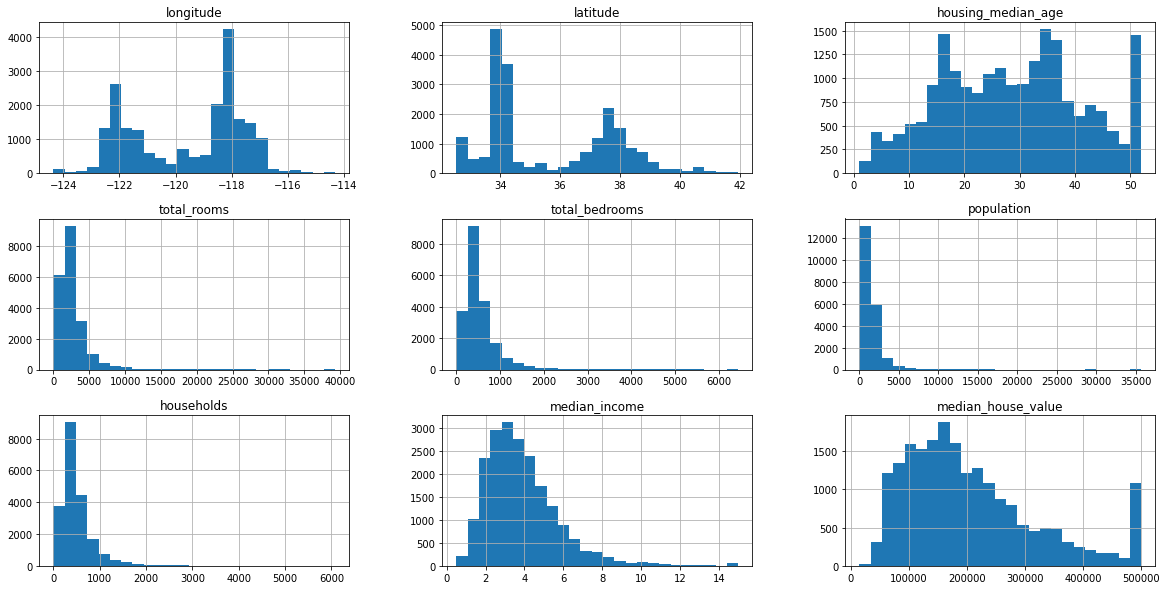

In [7]:
df.hist(bins=25,figsize=(20,10));

<AxesSubplot:>

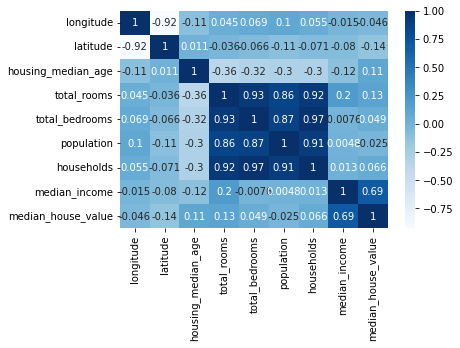

In [8]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [9]:
corr_matrix = df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

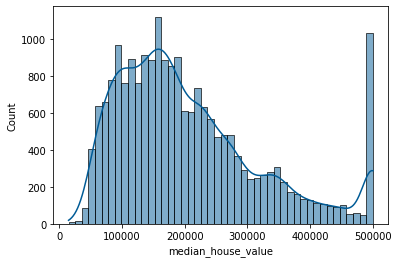

In [10]:
sns.histplot(df['median_house_value'], color = '#005b96', kde= True);

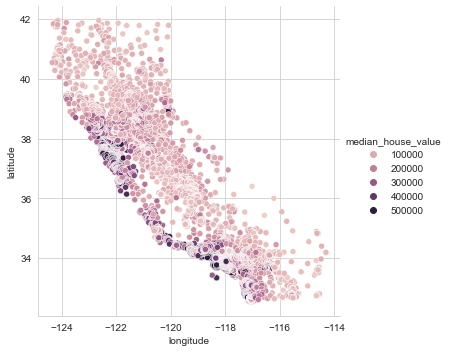

In [11]:
sns.set_style('whitegrid')
sns.relplot(x='longitude', y='latitude', hue='median_house_value', data=df, kind='scatter');

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

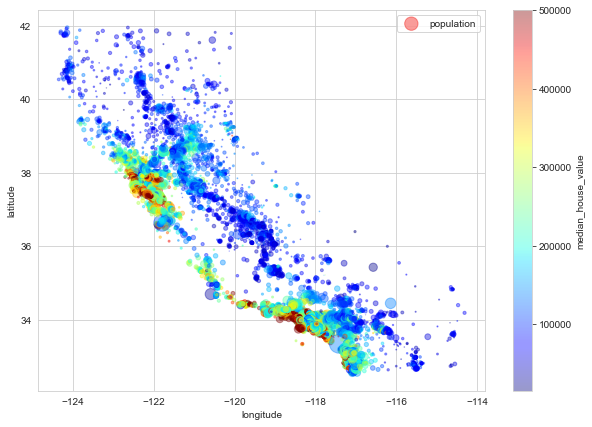

In [12]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, 
             s=df['population']/100, label='population', figsize=(10, 7), 
             c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True,
             sharex=False)

In [13]:
housing_1 = df.drop("median_house_value", axis=1)     #drop copy the orignal datframe into housing
housing_1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [14]:
housing_2 = df.drop(["median_house_value", 'longitude', 'latitude', 'population'], axis=1)     #drop copy the orignal datframe into housing
housing_2

,housing_median_age,total_rooms,total_bedrooms,households,median_income,ocean_proximity
0,41.0,880.0,129.0,126.0,8.3252,NEAR BAY
1,21.0,7099.0,1106.0,1138.0,8.3014,NEAR BAY
2,52.0,1467.0,190.0,177.0,7.2574,NEAR BAY
3,52.0,1274.0,235.0,219.0,5.6431,NEAR BAY
4,52.0,1627.0,280.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,330.0,1.5603,INLAND
20636,18.0,697.0,150.0,114.0,2.5568,INLAND
20637,17.0,2254.0,485.0,433.0,1.7000,INLAND
20638,18.0,1860.0,409.0,349.0,1.8672,INLAND


In [15]:
def AutoML(scaler_list, encoder_list, model_list, dataset):

    scaler = scaler_list
    encoder = encoder_list
    model = model_list

    items = [scaler_list, encoder_list, model_list]
    combi = list(product(*items))


    num_data = dataset.select_dtypes(include='number').columns.to_list()
    cat_data = dataset.select_dtypes(include='object').columns.to_list()

    for i in range(len(combi)):
        num_transformer = combi[i][0]
        cat_transformer = combi[i][1]
        base_model = combi[i][2]
        dataset = dataset
        
        preprocessor = ColumnTransformer(transformers=[('numeric', num_transformer, num_data),
                                                        ('categorical', cat_transformer, cat_data)], remainder='drop')


        pipe = Pipeline(steps=[('preprocessor', preprocessor),
                                ('base_model',base_model)])
       

        kmeans_param_grid = {'base_model__n_clusters':range(2,13), 
                            'base_model__init':['k-means++','random']}

        gmm_param_grid = {'base_model__n_components':range(2,13)}

        dbscan_param_grid = {'base_model__eps':[0.1,0.3,0.5,0.7], 
                            'base_model__min_samples':[3,5,7,9]}

        optics_param_grid = {'base_model__min_samples':[3,5,7,9],
                             'base_model__metric':['euclidean', 'manhattan'],
                             'base_model__algorithm':['auto']}
        
        if str(base_model) == 'KMeans()' : param_grid = kmeans_param_grid
        elif str(base_model) == 'GaussianMixture()' : param_grid = gmm_param_grid
        elif str(base_model) == 'DBSCAN()' : param_grid = dbscan_param_grid
        elif str(base_model) == 'OPTICS()' : param_grid = optics_param_grid


        grid = GridSearchCV(estimator=pipe,
                            param_grid = param_grid,
                            scoring=silhouette_score,
                            n_jobs = -1).fit(dataset)
        
        X = preprocessor.fit_transform(dataset)

        if str(base_model) == 'KMeans()' : 
            best = list(grid.best_params_.values())
            labels = KMeans(n_clusters = best[1], init = str(best[0])).fit_predict(X)
        elif str(base_model) == 'GaussianMixture()' : 
            best = list(grid.best_params_.values())
            labels = GaussianMixture(n_components = best[0]).fit_predict(X)
        elif str(base_model) == 'DBSCAN()' : 
            best = list(grid.best_params_.values())
            labels = DBSCAN(eps = best[1], min_samples= best[0]).fit_predict(X)
        elif str(base_model) == 'OPTICS()' : 
            best = list(grid.best_params_.values())
            labels = OPTICS(min_samples = best[2], metric = str(best[1]), algorithm = str(best[0])).fit_predict(X)

        print('------------------------------------   Evaluation   ------------------------------------------')
        print('Scaler :', num_transformer, '   Encoder :',cat_transformer, '   Base_Model :', base_model)
        print('Silhouette score(Euclidean) :', silhouette_score(X, labels, metric='euclidean'))
        print('Silhouette score(Manhattan) :', silhouette_score(X, labels, metric='manhattan'))
        print('Davies_bouldin_score :', davies_bouldin_score(X, labels))
        print('Calinski_harabasz_score :', calinski_harabasz_score(X, labels))
        print('')



    print('Best estimator : {}'.format(grid.best_estimator_))


In [ ]:
scaler = [StandardScaler(), RobustScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()]
encoder = [OneHotEncoder(), LabelEncoder()]
model = [KMeans(), GaussianMixture(), DBSCAN(), OPTICS()]
dataset = housing_1
AutoML(scaler, encoder, model, dataset)
#AutoML([StandardScaler(), RobustScaler()], [OneHotEncoder()], [KMeans(), GaussianMixture()], dataset)